In [1]:
%pip install matplotlib tqdm

import matplotlib.pyplot as plt
import preprocess as pp
import torch
import torch
from write_data import write_data
from train import train_network

Note: you may need to restart the kernel to use updated packages.


C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


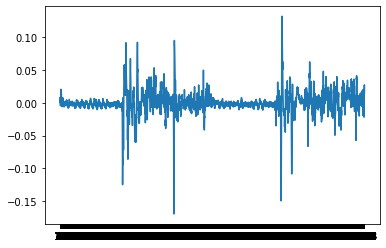

In [2]:
import numpy as np

train_set = pp.convert_dataset("../data/Focus.csv")
mean_values = pp.get_mean_values(train_set)
plt.plot(mean_values)
plt.xticks(np.arange(0, len(mean_values), 1))
plt.show()

In [3]:
def labelize_set(train_set):
    result = list()
    for index, element in enumerate(train_set):
        if (index < 1500 or (index > 3900 and index < 5400)):
            result.append((element, 0))
        else:
            result.append((element, 1))
    return result
    
labelled_set = labelize_set(train_set)
focusedCount = 0
for signals, labels in labelled_set:
    if (labels == 0):
        focusedCount+=1

write_data(labelled_set, "../models/focusdata.csv")

In [4]:
from load_data import load_dataset

dataset = load_dataset("../models/focusdata.csv")

In [5]:
labelled_set

[(tensor([-0.0002,  0.0079, -0.0038, -0.0008,  0.0031,  0.0033,  0.0081, -0.0127,
           0.0303,  0.0093, -0.0005,  0.0017,  0.0055, -0.0012, -0.0039,  0.0180,
           0.0171,  0.0034,  0.0007, -0.0067,  0.0075,  0.0064,  0.0034,  0.0005,
           0.0061,  0.0078,  0.0040,  0.0081, -0.0064, -0.0132, -0.0081,  0.0052]),
  0),
 (tensor([-4.0550e-03,  4.0684e-03, -4.6647e-03, -3.6627e-04,  1.0961e-03,
           2.2018e-04,  3.6367e-03, -1.4428e-02,  3.0833e-02,  1.0477e-02,
           9.6092e-04, -1.5081e-03,  3.3239e-03, -1.5008e-03, -3.8570e-03,
           1.8341e-02,  1.4756e-02,  3.1568e-03,  8.2266e-04, -7.8869e-03,
           4.5646e-03,  2.4705e-03, -1.9342e-03, -3.7471e-03,  8.0677e-03,
           1.1660e-02, -8.6052e-05,  3.4916e-03, -1.0971e-02, -1.8256e-02,
          -8.2419e-03,  1.2274e-03]),
  0),
 (tensor([-0.0050,  0.0044, -0.0014,  0.0012,  0.0037, -0.0003,  0.0029, -0.0108,
           0.0294,  0.0100, -0.0004, -0.0037,  0.0013, -0.0043, -0.0073,  0.0163,
      

In [6]:
dataset

[([-0.0001898588816402,
   0.0079492144286632,
   -0.0037731141783297,
   -0.0008171702502295,
   0.0031350781209766,
   0.0033032032661139,
   0.0081428866833448,
   -0.0127430334687232,
   0.0302992425858974,
   0.0092906383797526,
   -0.0005349088460206,
   0.0016942871734499,
   0.0055262213572859,
   -0.0011544482549652,
   -0.0039233029820024,
   0.0179500542581081,
   0.0170568507164716,
   0.0034401849843561,
   0.0007064960664138,
   -0.0067188167013227,
   0.0075005120597779,
   0.0063542751595377,
   0.003381164278835,
   0.0004713966045528,
   0.0061483695171773,
   0.0078405309468507,
   0.0039536347612738,
   0.0081278411671519,
   -0.0063612749800086,
   -0.0132384775206446,
   -0.0081205246970057,
   0.0051644789054989],
  0),
 ([-0.0040549752302467,
   0.0040684281848371,
   -0.0046646767295897,
   -0.000366274616681,
   0.001096092397347,
   0.0002201794850407,
   0.0036366949789226,
   -0.0144279357045888,
   0.0308330301195383,
   0.0104767465963959,
   0.0009609162

In [7]:
train_set, test_set = pp.split_data(dataset)

network, train_accuracies, test_accuracies = train_network(train_set=train_set, test_set=test_set, epoch=50, learning_rate=0.05, batch_size=64)

plt.plot(train_accuracies)
plt.plot(test_accuracies)

  0%|          | 0/50 [00:00<?, ?it/s]


AttributeError: 'list' object has no attribute 'view'

In [ ]:
torch.save(network.state_dict(), "../models/network.pt")